# How to Neural Netowks Works with Simple Handwritten Example

#Import the libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


In [4]:
len(x_train)

60000

In [6]:
len(y_test)

10000

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

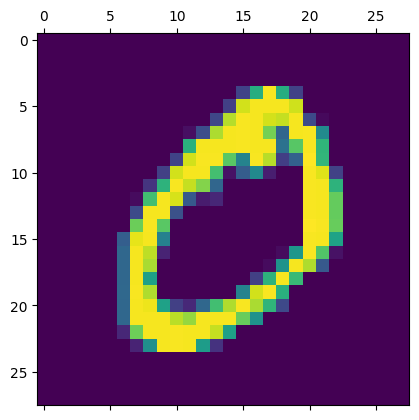

In [12]:
plt.matshow(x_train[1])

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
x_train=x_train/255

x_test=x_test/255

### Flatten means the two dimensional to one dimensional

In [22]:
x_train.shape

x_train_flattened = x_train.reshape(len(x_train), 28*28)

x_test_flattened = x_test.reshape(len(x_test), 28*28)


In [23]:
x_train_flattened.shape

(60000, 784)

In [24]:
x_train_flattened.shape

(60000, 784)

In [25]:
x_train_flattened[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8103 - loss: 0.7289
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9137 - loss: 0.3080
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9184 - loss: 0.2882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9225 - loss: 0.2802
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9268 - loss: 0.2642


### check test accuracy

In [32]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9156 - loss: 0.3006


[0.26513490080833435, 0.925599992275238]

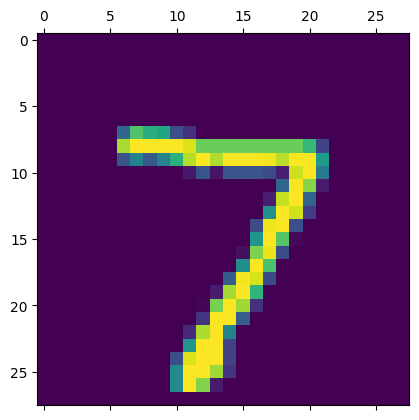

In [34]:
plt.matshow(x_test[0])

In [36]:
y_predict=model.predict(x_test_flattened)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([2.2937151e-02, 4.0685387e-07, 4.9585484e-02, 9.5066035e-01,
       2.2206444e-03, 1.3520126e-01, 2.0278142e-06, 9.9979979e-01,
       7.6224245e-02, 7.3992580e-01], dtype=float32)

In [38]:
np.argmax(y_predict[0])

np.int64(7)

### create confusion martix

In [42]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:5] 

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [43]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [44]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    5,    9,    4,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  922,   17,    8,    4,   13,   11,   37,    4],
       [   3,    0,   20,  918,    0,   24,    2,   11,   21,   11],
       [   2,    1,    6,    0,  908,    0,    9,    5,   10,   41],
       [  10,    3,    4,   31,   11,  772,   16,    6,   31,    8],
       [  11,    3,    8,    1,    7,   10,  914,    2,    2,    0],
       [   1,    6,   24,    2,    4,    0,    0,  956,    1,   34],
       [   7,    7,    6,   16,    8,   22,   10,   13,  875,   10],
       [  10,    7,    2,    8,   21,    7,    0,   26,    6,  922]],
      dtype=int32)>

### create visualization

Text(95.72222222222221, 0.5, 'truth')

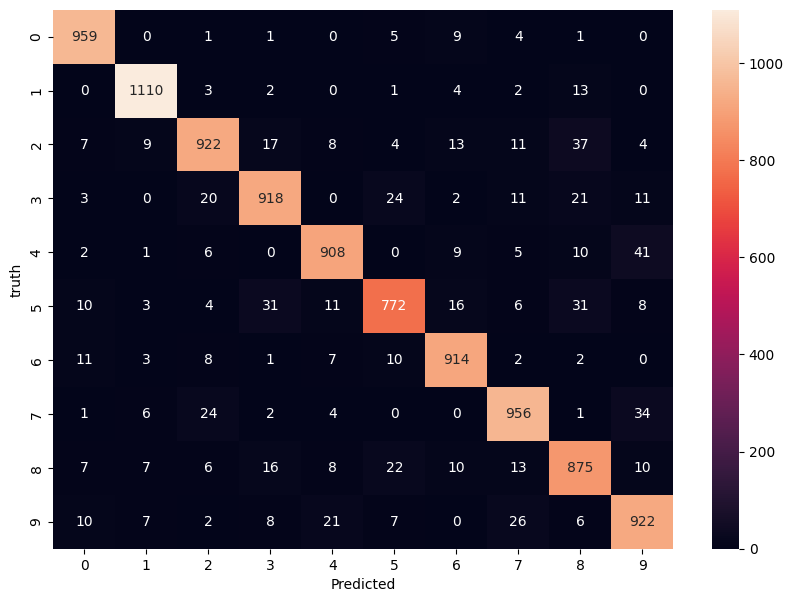

In [45]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("truth")


### in last method error is big so add one hidden layer 

In [46]:
model1=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  #add one hidden layer
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_train_flattened, y_train, epochs=5)

c:\Users\jk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8679 - loss: 0.4596
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9625 - loss: 0.1308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9756 - loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9820 - loss: 0.0625
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9860 - loss: 0.0483


In [48]:
model1.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9702 - loss: 0.0879


[0.07649609446525574, 0.9753000140190125]

In [51]:
y_predict = model1.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:5] 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

Text(95.72222222222221, 0.5, 'truth')

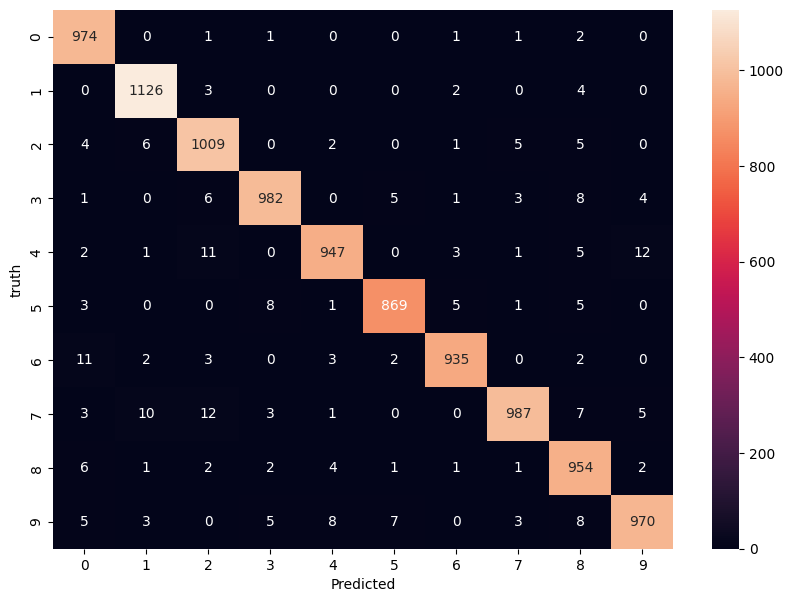

In [52]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("truth")


### now the error is less so built in flatten layer so copy the previous code

In [54]:
model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  #add one hidden layer
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=5)

c:\Users\jk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8747 - loss: 0.4562
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9614 - loss: 0.1322
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9739 - loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9806 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9842 - loss: 0.0515


In [55]:
model1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9726 - loss: 0.0932


[0.08080931752920151, 0.9761000275611877]

In [56]:
y_predict = model1.predict(x_test)
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:5] 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

Text(95.72222222222221, 0.5, 'truth')

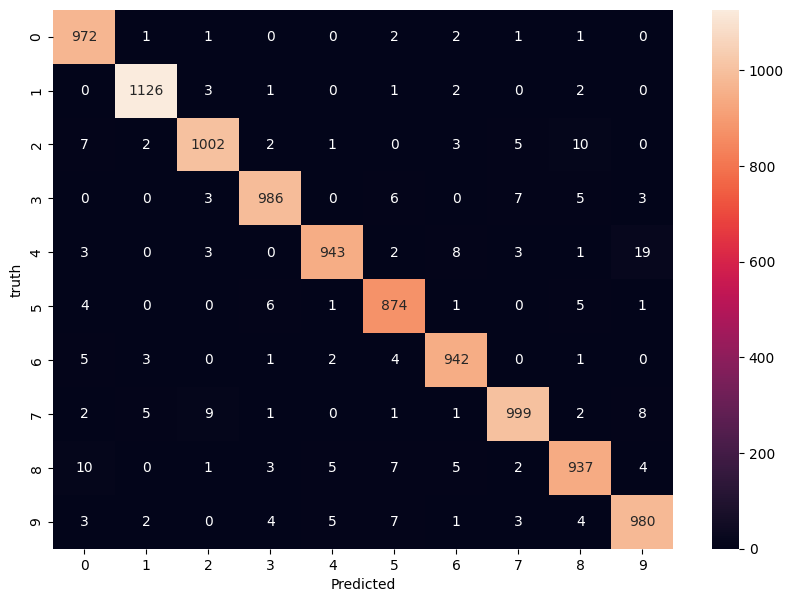

In [57]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("truth")
